In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

In [74]:
losses = pd.read_csv('automobile-losses.csv')

In [75]:
risk = pd.read_csv('automobile-risk.csv')

In [76]:
spec = pd.read_csv('automobile-spec.csv')

In [77]:
losses.head()

,ID,normalized-losses
0,1,NaN
1,2,NaN
2,3,NaN
3,4,164.0
4,5,164.0


In [78]:
risk.head()

,ID,symboling
0,1,3
1,2,3
2,3,1
3,4,2
4,5,2


In [79]:
spec.columns

Index(['ID', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheel', 'engine-loc', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'cylinder', 'engine-size', 'fuel-system',
       'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
       'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [80]:
spec.isnull().sum()

ID                   0
make                 0
fuel-type            0
aspiration           0
num-of-doors         1
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

## Merging Data 3 Tabel

**1. Gabungan 3 Tabel dengan key ID**

In [81]:
data = pd.merge(losses, risk, how='outer')
data = pd.merge(spec, data, how='outer')
data.head(10)

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses,symboling
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,NaN,3
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,NaN,3
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,NaN,1
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,164.0,2
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,164.0,2
5,6,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,NaN,2
6,7,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0,158.0,1
7,8,audi,gas,std,four,wagon,fwd,front,105.8,192.7,...,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0,NaN,1
8,9,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0,158.0,1
9,10,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,3.13,3.40,7.0,160.0,5500.0,16,22,NaN,NaN,0


In [82]:
#Dimension
data.shape #ada 205 rows dan 27 columns

(205, 27)

In [83]:
data.ndim

2

In [84]:
data.dtypes

ID                     int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheel           object
engine-loc            object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
cylinder              object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
normalized-losses    float64
symboling              int64
dtype: object

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
ID                   205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         204 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-

In [86]:
data.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses,symboling
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,NaN,3
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,NaN,3
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,NaN,1
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,164.0,2
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,164.0,2


In [87]:
data['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

**2. Identifikasi Data Hasil Merge**

In [88]:
count_missing = data.isnull().sum()
count_missing

ID                    0
make                  0
fuel-type             0
aspiration            0
num-of-doors          1
body-style            0
drive-wheel           0
engine-loc            0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
cylinder              0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
normalized-losses    41
symboling             0
dtype: int64

In [89]:
#normalisasi data NA

data = data.drop(columns='normalized-losses')

In [90]:
data['num-of-doors'].head()

0     two
1     two
2     two
3    four
4    four
Name: num-of-doors, dtype: object

In [91]:
bore_med = data['bore'].median()
stroke_med = data['stroke'].median()
horsepower_med = data['horsepower'].median()
peak_med = data['peak-rpm'].median()

In [92]:
data = data.fillna({
    'bore':bore_med,
    'stroke':stroke_med,
    'horsepower':horsepower_med,
    'peak-rpm':peak_med
})

In [93]:
data.shape

(205, 26)

In [94]:
data = data.dropna()

In [95]:
data.shape

(200, 26)

In [96]:
data.isnull().sum()

ID                   0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
symboling            0
dtype: int64

In [97]:
X = np.asarray(data['length'],data['horsepower'])
X

array([168.8, 168.8, 171.2, 176.6, 176.6, 177.3, 192.7, 192.7, 192.7,
       176.8, 176.8, 176.8, 176.8, 189. , 189. , 193.8, 197. , 141.1,
       155.9, 158.8, 157.3, 157.3, 157.3, 157.3, 157.3, 157.3, 174.6,
       173.2, 144.6, 144.6, 150. , 150. , 150. , 163.4, 157.1, 167.5,
       167.5, 175.4, 175.4, 175.4, 169.1, 170.7, 172.6, 199.6, 199.6,
       191.7, 159.1, 159.1, 159.1, 166.8, 166.8, 169. , 169. , 169. ,
       169. , 177.8, 177.8, 177.8, 177.8, 177.8, 177.8, 175. , 175. ,
       190.9, 190.9, 187.5, 202.6, 202.6, 180.3, 208.1, 199.2, 178.4,
       157.3, 157.3, 157.3, 157.3, 173. , 173. , 173.2, 173.2, 173.2,
       172.4, 172.4, 172.4, 172.4, 165.3, 165.3, 165.3, 165.3, 170.2,
       165.3, 165.6, 165.3, 170.2, 162.4, 173.4, 173.4, 181.7, 184.6,
       184.6, 170.7, 170.7, 178.5, 186.7, 186.7, 198.9, 198.9, 186.7,
       186.7, 198.9, 198.9, 186.7, 186.7, 186.7, 157.3, 157.3, 157.3,
       167.3, 167.3, 174.6, 173.2, 168.9, 168.9, 168.9, 168.9, 181.5,
       176.8, 186.6,

## Clustering with K-Means, Hierarchical Clustering, DBSCAN

## 1. K-Means Clustering

In [98]:
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [99]:
data

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,-1
201,202,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,-1
202,203,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,-1
203,204,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,-1


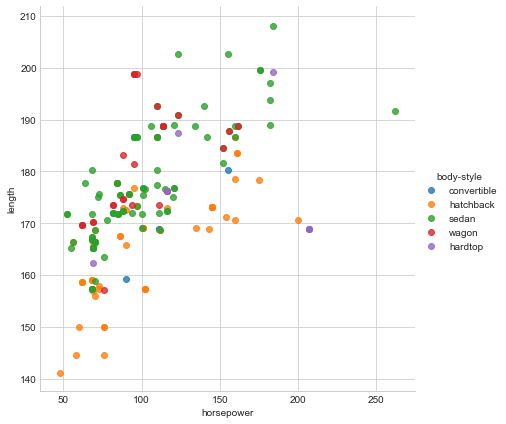

In [100]:
sns.lmplot(x = 'horsepower', y = 'length', data = data, fit_reg = False, hue = 'body-style', size = 6, aspect = 1)

In [101]:
X_1 = data.iloc[:, [9,20]].values
y = data.iloc[:, 5].values

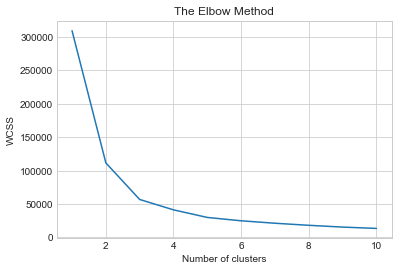

In [102]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [105]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_1)

In [107]:
print(kmeans.cluster_centers_)

[[183.80263158 167.15789474]
 [165.42988506  72.2183908 ]
 [179.736      107.05333333]]


In [108]:
print(kmeans.labels_)

[2 2 0 2 2 2 2 2 0 2 2 2 2 2 0 0 0 1 1 1 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 2 0 0 0 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 2 1 2 2 2 2 0 0 0 0 0 1 1
 1 2 2 1 0 0 0 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 0 0 0 0 0 0 2 2 2 2 2 2 2 2
 2 2 0 1 2 1 1 1 1 0 0 0 0 0 2 2 2 2 2 2 0 0 1 1 1 1 1 2 1 2 1 2 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 0 0 0 0 1 1 1 1 1 1 2 1
 1 2 1 2 2 2 2 2 0 0 2 0 2 2 2]


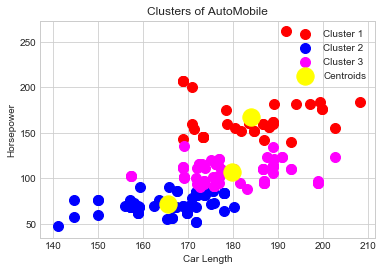

In [119]:
plt.scatter(X_1[y_kmeans == 0, 0], X_1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_1[y_kmeans == 1, 0], X_1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_1[y_kmeans == 2, 0], X_1[y_kmeans == 2, 1], s = 100, c = 'magenta', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of AutoMobile')
plt.xlabel('Car Length')
plt.ylabel('Horsepower')
plt.legend()
plt.show()

In [113]:
from sklearn.metrics import silhouette_score

labels = kmeans.labels_
silhouette_score(X_1, labels, metric='euclidean')

0.5230231307432605

## 2. Hierarchical Clustering

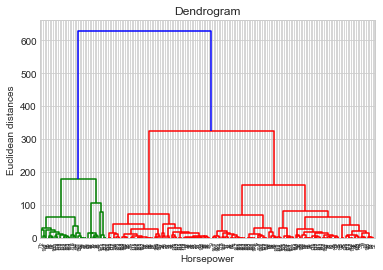

In [124]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X_1, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Horsepower')
plt.ylabel('Euclidean distances')
plt.show()

In [118]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_1)
y_hc

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0,
       0, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1], dtype=int64)

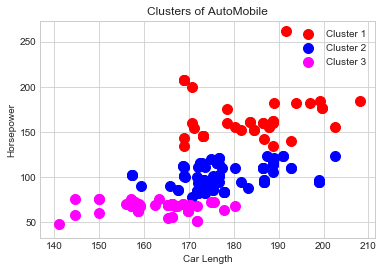

In [122]:
plt.scatter(X_1[y_hc == 0, 0], X_1[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_1[y_hc == 1, 0], X_1[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_1[y_hc == 2, 0], X_1[y_hc == 2, 1], s = 100, c = 'magenta', label = 'Cluster 3')
#plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of AutoMobile')
plt.xlabel('Car Length')
plt.ylabel('Horsepower')
plt.legend()
plt.show()

In [125]:
#from sklearn.metrics import silhouette_score

labels1 = y_hc
silhouette_score(X_1, labels1, metric='euclidean')

0.5272980341890715

## 3. DBSCAN

In [136]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [154]:
dbscan  = DBSCAN(eps=10)
model   = dbscan.fit_predict(X_1)
model

array([ 0,  0,  1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  2,  2,  2,
       -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  2, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        1,  2,  2, -1,  0,  0,  0, -1,  0,  0,  1,  1,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1, -1,
        1,  0,  0, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  1,  1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  0,  1, -1,  0,  0], dtype=int64)

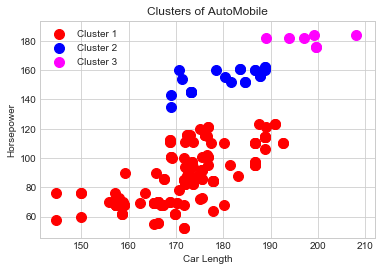

In [155]:
plt.scatter(X_1[model == 0, 0], X_1[model == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_1[model == 1, 0], X_1[model == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_1[model == 2, 0], X_1[model == 2, 1], s = 100, c = 'magenta', label = 'Cluster 3')
#plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of AutoMobile')
plt.xlabel('Car Length')
plt.ylabel('Horsepower')
plt.legend()
plt.show()

In [156]:
print(silhouette_score(X_1, model,metric='euclidean'))

0.45247648669066814


## 4. Evaluasi Model

   **Berapa *cluster* yang Anda buat?**
   <br>Berdasarkan plot WCSS dan Elbow Point, saya menentukan jumlah *cluster* yang dibangun ada sebanyak 3 buah.
  
  **Anda menggunakan atribut/fitur apa saja?**
  <br> Untuk fitur pemilihan model, saya menggunakan **length** dan **horsepower** yang diplot terhadap kelas **body-type**
  

   **Algoritma apa yang Anda pilih dan mengapa?**
   <br>Saya memilih algoritma Hierarchial Clustering, karena setelah diuji berdasarkan plotnya, algoritma HC berhasil memetakan sebuah titik yang gagal dipetakan oleh algoritma K-means, dapat dilihat pada hasil perbandingan plot dibawah ini. Algoritma Hierarchial Clustering juga memiliki nilai silhoutte terbaik dari ketiga model yang dibangkitkan, sehingga cocok untuk dipilih sebagai algoritma klastering pada kasus data ini.
   
   **Apa ciri-ciri dari setiap algoritma yang anda coba?**
   <br> Untuk **algoritma K-means**, dia memiliki ciri-ciri secara umum adalah adanya penentuan nilai awal (*initial value*) dan jumlah klaster yang akan dibangkitkan.
   <br> Untuk **algoritma Hierarchial Clustering**, dia memiliki beberapa ciri-ciri juga seperti pembuatan dendogram terhadap data dan juga terdapat variasi *linkage* yang dapat dilakukan seperti Ward, Single, atau Complete. Pada algoritma ini juga terdapat fungsi method/affinity. Algoritma ini kurang cocok untuk data yang bersifat kontinyu.
   <br> Untuk **algoritma DBSCAN**, dia memiliki ciri-ciri utama yaitu penentuan nilai minPts dan epsilon sebagai syarat awal pengolahan model.
    

### Perbedaan hasil plot K-means dan HC

**plot K-means**

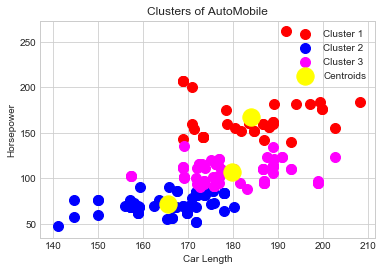

In [157]:
plt.scatter(X_1[y_kmeans == 0, 0], X_1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_1[y_kmeans == 1, 0], X_1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_1[y_kmeans == 2, 0], X_1[y_kmeans == 2, 1], s = 100, c = 'magenta', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of AutoMobile')
plt.xlabel('Car Length')
plt.ylabel('Horsepower')
plt.legend()
plt.show()

**plot HC**

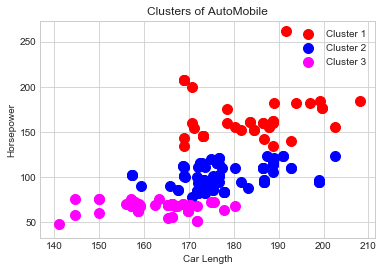

In [158]:
plt.scatter(X_1[y_hc == 0, 0], X_1[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_1[y_hc == 1, 0], X_1[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_1[y_hc == 2, 0], X_1[y_hc == 2, 1], s = 100, c = 'magenta', label = 'Cluster 3')
#plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of AutoMobile')
plt.xlabel('Car Length')
plt.ylabel('Horsepower')
plt.legend()
plt.show()

Perbedaan paling mendasar dapat dilihat pada grid (160,100) dimana algoritma HC berhasil memetakan hasil yang sesuai dibandingkan dengan algoritma K-means

### Terima Kasih